# <span style="color:#F72585">Modelo logístico de predicción en tf.keras</span>

## <span style="color:#4361EE">Introducción</span> 

En esta lección construimos un modelo predictivo de regresión logística usando los datos de cáncer de la Universidad de Wisconsin.

Usaremos las funciones de activación *relu* y *sigmoid* y el regularizador *Dropout*. Adicionalmente introducimos el  modo 2 de escribir un modelo *Sequential*.

Finalmente se construye una matriz de confusión para el problema.

## <span style="color:#4361EE">Importar módulos</span>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.9.1


## <span style="color:#4361EE">Funciones de activación</span>

### <span style="color:#4CC9F0">Logística o sigmoide</span>

Dada la salida del sumador, digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *sigmoid* está definida por:

$$
sigmoid(y) = \frac{1}{1+\exp(-y)}
$$

Entonces, esta función de activación transforma cualquier número real en un número en el intervalo $(0,1)$, de tal manera que puede ser interpretado como una probabilidad. 

### <span style="color:#4CC9F0">Relu</span>

Dada la salida del sumador, digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *relu* está definida por:

$$
relu(y) = \begin{cases} &0, \text{ si } y\le 0,\\
 &y, \text{ en otro caso } \end{cases}
$$



## <span style="color:#4361EE">Regularizadores</span>

### <span style="color:#4CC9F0">Dropout</span>

Usaremos el regularizador *Dropout*. [Dropout paper](https://jmlr.org/papers/v15/srivastava14a.html). Este regularizador deja por fuera del entrenamiento en cada epoch un porcentaje de las neuronas de la capa, escogidas de forma aleatoria en cada epoch. Por ejemplo `Dropout(0.1)` deja el $10\%$ de las neuronas por fuera del entrenamiento en cada epoch. En el artículo muestran que en muchos casos este regularizador funciona mejor que los clásicos L1 y L2.

## <span style="color:#4361EE">El conjunto de datos cáncer de seno Wisconsin</span>

Puede descargar los datos en [kaggle- cancer de seno-Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

### <span style="color:#4CC9F0">Meta-información sobre los datos</span>



1. ID number
2. Diagnosis (M = maligno, B = benigno) 

Se calculan diez características de valor real para cada núcleo celular:

  - radius (media de las distancias desde el centro a los puntos del perímetro) 
  - texture (desviación estándar de los valores de la escala de grises) 
  - perimeter
  - area
  - smoothness (variación local en las longitudes de los radios)
  - compactness (perímetro ^ 2 / área - 1.0) 
  - concavity (severidad de las porciones cóncavas del contorno) 
  - concave points (número de porciones cóncavas del contorno) 
  - symmetry 
  - fractal dimension ("aproximación de la línea de costa" - 1)
 
La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

Datos faltantes: ninguno.

Distribución de clases: 357 benignos, 212 malignos.

## <span style="color:#4361EE">Lectura de datos</span>

### <span style="color:#4CC9F0">Separa entrada (features) y salida</span>

In [3]:
# Importando la data
data = pd.read_csv('https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Machine_Learning/Datos/breast_cancer/data.csv')
del data['Unnamed: 32']

## <span style="color:#4361EE">Preprocesamiento</span>

In [4]:
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

### <span style="color:#4CC9F0">Recodifica la variable objetivo</span>

In [5]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### <span style="color:#4CC9F0">Divide los datos. Entrenamiento y test</span>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [7]:
x_test.shape

(57, 30)

### <span style="color:#4CC9F0">Normaliza los datos</span>

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## <span style="color:#4361EE">Crea el modelo Sequential modo 2</span>

In [9]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adiciona dropout para prevenir overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% en cada época
classifier.add(Dense(units=16, activation='relu'))
# Adiciona dropout para prevenir overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

## <span style="color:#4361EE">Compila</span>

In [10]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
classifier.summary()
plot_model(classifier, to_file='../Imagenes/cancer_seno.png', 
           show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install g

## <span style="color:#4361EE">Entrenamiento</span>

In [12]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150, validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 1s 27ms/step - loss: 0.7561 - accuracy: 0.3961 - val_loss: 0.6726 - val_accuracy: 0.4951
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.6460 - accuracy: 0.6406 - val_loss: 0.5898 - val_accuracy: 0.7864
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.7677 - val_loss: 0.5207 - val_accuracy: 0.8350
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.8484 - val_loss: 0.4545 - val_accuracy: 0.8835
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.8753 - val_loss: 0.3920 - val_accuracy: 0.9029
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3802 - accuracy: 0.9120 - val_loss: 0.3353 - val_accuracy: 0.9223
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.9267 - val_loss: 0.2882 - val_accuracy: 0.9320
Epoch 8/150


## <span style="color:#4361EE">Predicciones</span>

In [13]:
# Predicción de los resultados del conjunto de pruebas
y_pred = classifier.predict(x_test)
# y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

2/2 [==============================] - 0s 2ms/step


## <span style="color:#4361EE">Matriz de confusión</span>

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


<AxesSubplot:>

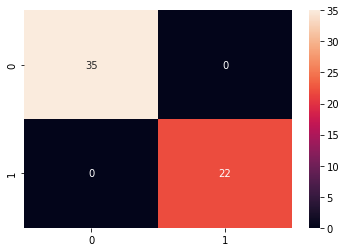

In [16]:
sns.heatmap(cm, annot=True)

## <span style="color:#4361EE">Evaluación del modelo</span>

In [17]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

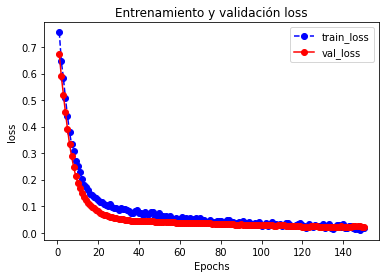

In [18]:
plot_metric(history, 'loss')

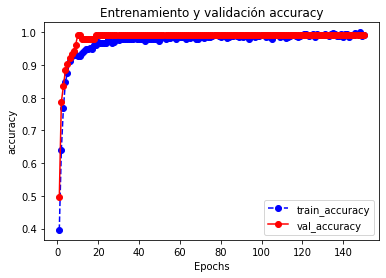

In [19]:
plot_metric(history, 'accuracy')